In [4]:
!pip install git+https://github.com/williamedwardhahn/mpcr #install github
from mpcr import * #import all commands from mpcr
import numpy

  Cloning https://github.com/williamedwardhahn/mpcr to /tmp/pip-req-build-4lvxo0yr
  Running command git clone -q https://github.com/williamedwardhahn/mpcr /tmp/pip-req-build-4lvxo0yr
  Created wheel for ImportMPCR: filename=ImportMPCR-0.0.1-cp36-none-any.whl size=5859 sha256=7f639c422817c42815cdf1295e66e0c0004d575bd8a8fe4dd61c864343d8b123
  Stored in directory: /tmp/pip-ephem-wheel-cache-mecvfnvl/wheels/89/93/47/ef43fe80a5b823a05d8dcca5ed1581f4fcdacf69b27110603f
Successfully built ImportMPCR


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Part 1

In [5]:
def midpoint(P, Q):  #mathematical formula for midpoint of two points
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1]))

In [6]:
vertices = [(0, 0), (2, 2*np.sqrt(3)), (4, 0)]  #creation of initial vertices
n = 5000 # Change this value and see what happens    #n determines the shape of the plot

In [7]:
x = [0]*n #creation of random variable with count of observations
y = [0]*n   #creation of random variables and initialization
x[0] = random() 
y[0] = random()

In [8]:
for i in range(1, n): #iterating over the randomly created variables an finding midpoint of the lines
    x[i], y[i] = midpoint( vertices[randint(0, 2)], (x[i-1], y[i-1]) )

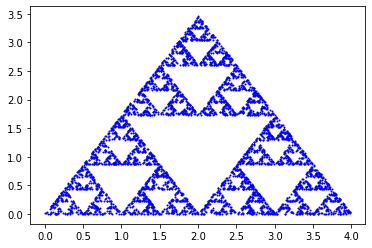

In [9]:
plt.scatter(x, y, color = 'b', s=1) #plotting x and y

In [27]:
def midpoint2(P, Q):  #mathematical formula for midpoint of two points
    return (0.5*(P[0] + Q[0]), 0.5*(P[1] + Q[1]))

In [32]:
vertices = [(0, 0), (2, np.sqrt(3)), (4, 0)]  #creation of initial vertices
n2 = 5000 # Change this value and see what happens    #n determines the shape of the plot

In [33]:
x2 = [0]*n2 #creation of random variable with count of observations
y2 = [0]*n2   #creation of random variables and initialization
x2[0] = random() 
y2[0] = random()

In [34]:
for i in range(1, n2): #iterating over the randomly created variables an finding midpoint of the lines
    x2[i], y2[i] = midpoint2( vertices[randint(0, 2)], (x[i-1], y[i-1]) )

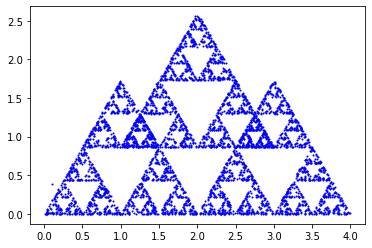

In [35]:
plt.scatter(x2, y2, color = 'b', s=1) #plotting x and y

In [ ]:
#Bonus: Try to extend this code to create patterns like these

<img src ='http://math.hws.edu/eck/js/chaos-game/exercises.png'>



# Part 2

In [ ]:
# Barnsley's Fern

In [ ]:
# 1% of the time:x → 0,y → 0.16 y
# 85% of the time:x → 0.85 x + 0.04 y, y → −0.04 x + 0.05 y + 1.6
# 7% of the time:x → 0.2 x − 0.26 y, y → 0.23 x + 0.22 y + 1.6
# 7% of the time:x → −0.15 x + 0.28 y, y → 0.26 x + 0.24 y + 0.44

In [36]:
def pick(p):
    c = np.cumsum(p)  #picks a random sum from the cumulative sums of the probabilistic results
    return bisect(c, np.random.random() * c[-1])

In [37]:
p = np.array([0.01,0.07,0.07,0.85]) #array of probabilities previously defined

In [38]:
eq = [np.array([[0,0,0],[0,0.16,0]]), #mathematical equations to be weighted by probability 
      np.array([[0.2,-0.26,0],[0.23,0.22,1.6]]), #for selection
      np.array([[-0.15, 0.28, 0],[0.26,0.24,0.44]]),
      np.array([[0.85, 0.04, 0],[-0.04, 0.85, 1.6]])]

In [42]:
n = 2500 # Change this value and see what happens
x = np.zeros((n,3)) #this value determines how precise the image is
x[:,2] = 1

In [43]:
for i in range(1,n): #function to find values from random probability 
    x[i,:2] = np.matmul(eq[pick(p)],x[i-1,:])

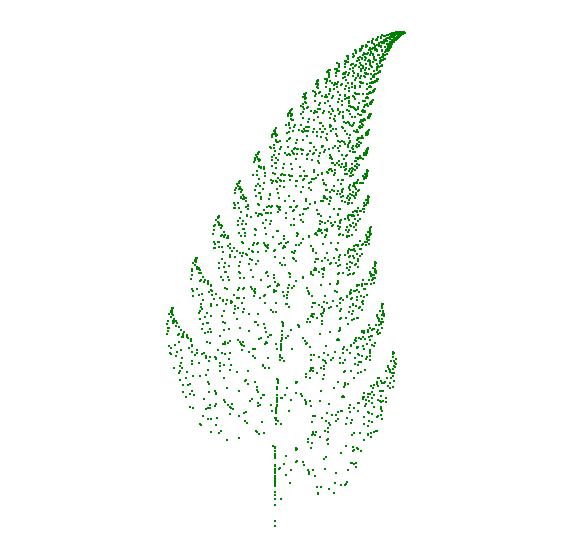

In [44]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0], x[:, 1], s=3, c="g", marker="s", linewidths=0)
plt.axis("equal"),plt.axis("off"); #plotting